In [1093]:
# 1. 데이터 불러오기
import pandas as pd
import openpyxl

file = r'C:\Users\KDP19\Desktop\Bigdata\7_mini\data\전국_업종별_총사업자수.xlsx'
DF = pd.read_excel(file)
DF

,년도,현황분류,소계,농ㆍ임ㆍ어업,광업,제조업,전기ㆍ가스ㆍ수도업,도매업,소매업,부동산매매업,건설업,음식업,숙박업,운수ㆍ창고ㆍ통신업,부동산임대업,대리ㆍ중개ㆍ도급업,서비스업
0,2014,총계,6348919,73811,2394,540200,16889,589132,844813,25326,394247,680886,41547,559998,1340456,58227,1180993
1,2014,신규,1127246,8348,131,67529,10173,93590,194263,6434,62089,189682,8406,68294,160028,18151,240128
2,2014,폐업,815624,4766,121,47163,1085,69386,159209,2884,42745,159121,5999,54236,86886,12636,169387
3,2015,총계,6702456,77868,2404,561753,21651,610082,880522,30158,418381,707801,44096,576268,1452177,64477,1254818
4,2015,신규,1191009,9720,174,68320,6792,90355,198124,8141,69987,186922,9183,67883,210891,19726,244791
5,2015,폐업,790050,5106,135,45499,1953,63698,151273,2752,42804,155172,6556,49478,93021,12577,160026
6,2016,총계,6886938,81120,2352,567546,25913,607602,875202,33230,432118,711299,45817,581542,1545516,67998,1309683
7,2016,신규,1226443,10525,156,65466,6818,89218,197187,8114,73407,187837,9743,63520,227927,20950,265575
8,2016,폐업,909202,6000,159,54287,2203,76400,172278,3883,51959,169164,7361,51928,114201,15134,184245
9,2017,총계,7226329,85232,2337,580316,48977,616448,890480,36951,454601,721979,48510,588656,1693299,73809,1384734


Mysql에 DataFrame 넣기 <hr>

In [1094]:
# 1. 모듈 로딩

import pymysql
import pymysql.cursors

In [1095]:
# 2. DB에 넣기

# host=서버주소, user=접속계정, passwd=계정비번, db=접속db, charset=문자인코딩방식
conn = pymysql.connect(host = '172.20.81.42', user='user2', passwd='1234',
                       db='7_mini', charset='utf8')
curs = conn.cursor(pymysql.cursors.DictCursor) # Dict 컬럼이름 키로



sql = '''insert into category_shut_down 
(year, 현황분류, 소계, 농임어업, 광업, 제조업, 전기가스수도업, 도매업, 소매업, 부동산매매업, 건설업, 음식업, 숙박업, 운수창고통신업, 부동산임대업, 대리중개도급업, 서비스업) 
values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)'''

for idx in range(len(DF)):
    curs.execute(sql, tuple(DF.iloc[idx]))
conn.commit() # sql에 데이터 저장

OperationalError: (2003, "Can't connect to MySQL server on '172.20.81.42' (timed out)")

In [ ]:
# '총계'와 '폐업' 데이터만 선택
closure = DF[DF['현황분류'].isin(['총계', '폐업'])]

# 업종별로 총계와 폐업 데이터 분리
total = closure[closure['현황분류'] == '총계']
closed = closure[closure['현황분류'] == '폐업']

# 데이터 병합
merged = pd.merge(total, closed, on='년도', suffixes=('_총계', '_폐업'))

# 각 업종별 폐업률 계산 (폐업 / 총계 * 100)
Industry = ['소계', '농ㆍ임ㆍ어업', '광업', '제조업', '전기ㆍ가스ㆍ수도업', '도매업', '소매업',
          '부동산매매업', '건설업', '음식업', '숙박업', '운수ㆍ창고ㆍ통신업', 
          '부동산임대업', '대리ㆍ중개ㆍ도급업', '서비스업']

# 각 업종의 값을 폐업률로 대체
for i in Industry:
    merged[i] = (merged[f'{i}_폐업'] / merged[f'{i}_총계']) * 100

# 최종 데이터프레임 생성
closed_pct = merged[['년도'] + Industry]

# 최종 결과 출력
closed_pct

,년도,소계,농ㆍ임ㆍ어업,광업,제조업,전기ㆍ가스ㆍ수도업,도매업,소매업,부동산매매업,건설업,음식업,숙박업,운수ㆍ창고ㆍ통신업,부동산임대업,대리ㆍ중개ㆍ도급업,서비스업
0,2014,12.846659,6.457032,5.054302,8.730655,6.424300,11.777666,18.845472,11.387507,10.842188,23.369698,14.439069,9.685035,6.481824,21.701273,14.342761
1,2015,11.787470,6.557251,5.615641,8.099467,9.020369,10.440892,17.179923,9.125274,10.230866,21.923111,14.867562,8.585936,6.405624,19.506180,12.752925
2,2016,13.201832,7.396450,6.760204,9.565216,8.501524,12.574020,19.684370,11.685224,12.024262,23.782404,16.066089,8.929364,7.389183,22.256537,14.067908
3,2017,12.566214,7.427961,6.718015,8.730588,5.849685,11.666677,19.509141,11.485481,10.824437,23.096378,14.937126,8.903162,6.755098,20.914794,13.918558
4,2018,11.735648,7.376387,6.133909,8.198550,8.275144,10.806218,18.328480,10.016659,10.162620,21.989259,14.512336,8.572155,6.119638,20.868201,13.300910
5,2019,11.460917,7.149399,6.622222,7.845067,10.500536,10.294323,18.459469,9.690424,9.850355,21.485083,13.361261,8.540716,5.945247,20.627079,12.807092
6,2020,10.349009,6.360809,7.340281,6.716978,9.844130,8.904325,16.639776,9.432975,8.299263,18.079627,12.437306,7.616505,6.663339,17.241338,11.186991
7,2021,9.614487,6.160701,6.115929,6.042076,6.244180,8.034314,16.275285,7.596102,7.585241,15.954714,11.321337,7.436712,6.396669,14.304064,10.100110
8,2022,8.962058,6.298925,6.141947,5.577595,4.829702,7.431891,15.657284,7.032959,7.048888,16.673034,10.021356,6.972910,4.806478,13.271504,9.485543
9,2023,9.914076,6.010447,6.004515,6.302574,4.362831,8.291297,18.906119,7.291211,7.948112,19.304455,9.715802,7.356716,3.888960,14.921766,10.641776


In [1076]:
closed_pct.set_index('년도', inplace=True)
closed_pct

,소계,농ㆍ임ㆍ어업,광업,제조업,전기ㆍ가스ㆍ수도업,도매업,소매업,부동산매매업,건설업,음식업,숙박업,운수ㆍ창고ㆍ통신업,부동산임대업,대리ㆍ중개ㆍ도급업,서비스업
년도,,,,,,,,,,,,,,,
2014,12.846659,6.457032,5.054302,8.730655,6.424300,11.777666,18.845472,11.387507,10.842188,23.369698,14.439069,9.685035,6.481824,21.701273,14.342761
2015,11.787470,6.557251,5.615641,8.099467,9.020369,10.440892,17.179923,9.125274,10.230866,21.923111,14.867562,8.585936,6.405624,19.506180,12.752925
2016,13.201832,7.396450,6.760204,9.565216,8.501524,12.574020,19.684370,11.685224,12.024262,23.782404,16.066089,8.929364,7.389183,22.256537,14.067908
2017,12.566214,7.427961,6.718015,8.730588,5.849685,11.666677,19.509141,11.485481,10.824437,23.096378,14.937126,8.903162,6.755098,20.914794,13.918558
2018,11.735648,7.376387,6.133909,8.198550,8.275144,10.806218,18.328480,10.016659,10.162620,21.989259,14.512336,8.572155,6.119638,20.868201,13.300910
2019,11.460917,7.149399,6.622222,7.845067,10.500536,10.294323,18.459469,9.690424,9.850355,21.485083,13.361261,8.540716,5.945247,20.627079,12.807092
2020,10.349009,6.360809,7.340281,6.716978,9.844130,8.904325,16.639776,9.432975,8.299263,18.079627,12.437306,7.616505,6.663339,17.241338,11.186991
2021,9.614487,6.160701,6.115929,6.042076,6.244180,8.034314,16.275285,7.596102,7.585241,15.954714,11.321337,7.436712,6.396669,14.304064,10.100110
2022,8.962058,6.298925,6.141947,5.577595,4.829702,7.431891,15.657284,7.032959,7.048888,16.673034,10.021356,6.972910,4.806478,13.271504,9.485543


In [1077]:
closed_pct.columns

Index(['소계', '농ㆍ임ㆍ어업', '광업', '제조업', '전기ㆍ가스ㆍ수도업', '도매업', '소매업', '부동산매매업', '건설업',
       '음식업', '숙박업', '운수ㆍ창고ㆍ통신업', '부동산임대업', '대리ㆍ중개ㆍ도급업', '서비스업'],
      dtype='object')

최종 <hr>

In [1078]:
closed_pct_1 = closed_pct.drop('소계', axis=1)
closed_pct_1

,농ㆍ임ㆍ어업,광업,제조업,전기ㆍ가스ㆍ수도업,도매업,소매업,부동산매매업,건설업,음식업,숙박업,운수ㆍ창고ㆍ통신업,부동산임대업,대리ㆍ중개ㆍ도급업,서비스업
년도,,,,,,,,,,,,,,
2014,6.457032,5.054302,8.730655,6.424300,11.777666,18.845472,11.387507,10.842188,23.369698,14.439069,9.685035,6.481824,21.701273,14.342761
2015,6.557251,5.615641,8.099467,9.020369,10.440892,17.179923,9.125274,10.230866,21.923111,14.867562,8.585936,6.405624,19.506180,12.752925
2016,7.396450,6.760204,9.565216,8.501524,12.574020,19.684370,11.685224,12.024262,23.782404,16.066089,8.929364,7.389183,22.256537,14.067908
2017,7.427961,6.718015,8.730588,5.849685,11.666677,19.509141,11.485481,10.824437,23.096378,14.937126,8.903162,6.755098,20.914794,13.918558
2018,7.376387,6.133909,8.198550,8.275144,10.806218,18.328480,10.016659,10.162620,21.989259,14.512336,8.572155,6.119638,20.868201,13.300910
2019,7.149399,6.622222,7.845067,10.500536,10.294323,18.459469,9.690424,9.850355,21.485083,13.361261,8.540716,5.945247,20.627079,12.807092
2020,6.360809,7.340281,6.716978,9.844130,8.904325,16.639776,9.432975,8.299263,18.079627,12.437306,7.616505,6.663339,17.241338,11.186991
2021,6.160701,6.115929,6.042076,6.244180,8.034314,16.275285,7.596102,7.585241,15.954714,11.321337,7.436712,6.396669,14.304064,10.100110
2022,6.298925,6.141947,5.577595,4.829702,7.431891,15.657284,7.032959,7.048888,16.673034,10.021356,6.972910,4.806478,13.271504,9.485543


그래프 그리기 <hr>

In [1079]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [1080]:
closed_all = closed_pct['소계']

전체 폐업률 <hr>

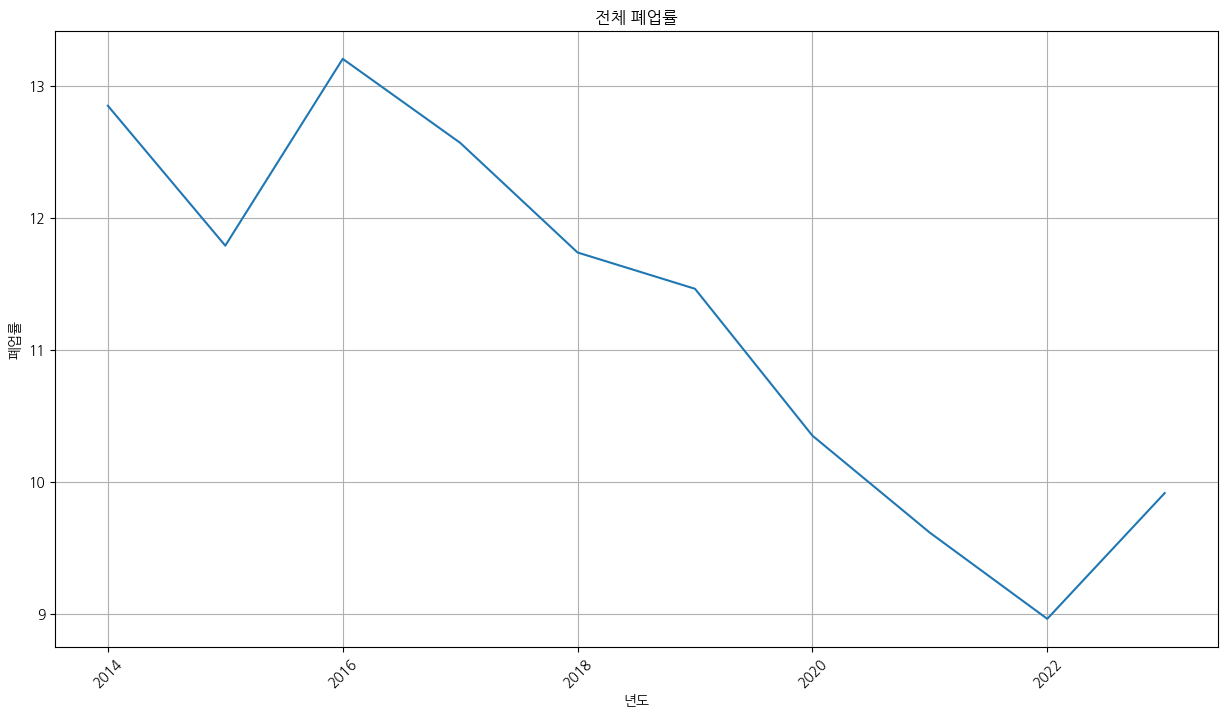

In [ ]:
# 선 그래프 그리기
plt.figure(figsize=(15, 8))

plt.plot(closed_all)

plt.title('전체 폐업률')  # 그래프 제목
plt.xlabel('년도')  # x축 라벨
plt.ylabel('폐업률')  # y축 라벨
plt.xticks(rotation=45)  # x축 레이블 각도 조정

plt.grid()

plt.show()

엄종별 폐업률 <hr>

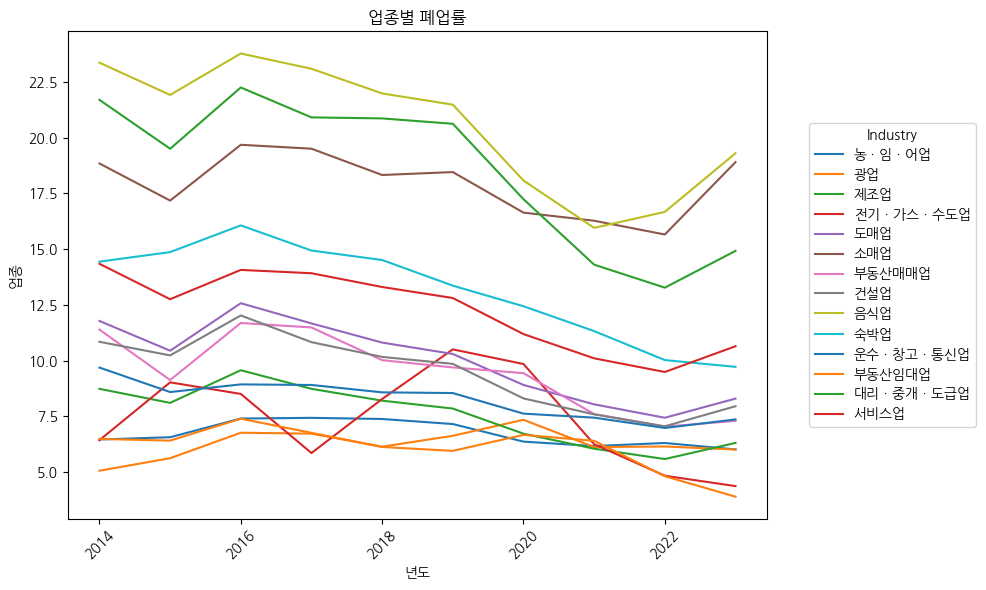

In [ ]:
# 선 그래프 그리기
closed_pct_1.plot(kind='line', figsize=(10, 6))  # 연도별로 각 업종의 변화를 라인 그래프로 그리기

plt.title('업종별 폐업률')  # 그래프 제목
plt.xlabel('년도')  # x축 라벨
plt.ylabel('업종')  # y축 라벨
plt.xticks(rotation=45)  # x축 레이블 각도 조정

#plt.legend(title='Industry')  # 범례 제목
plt.legend(title='Industry', bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.tight_layout()  # 레이아웃 자동 조정

plt.show()


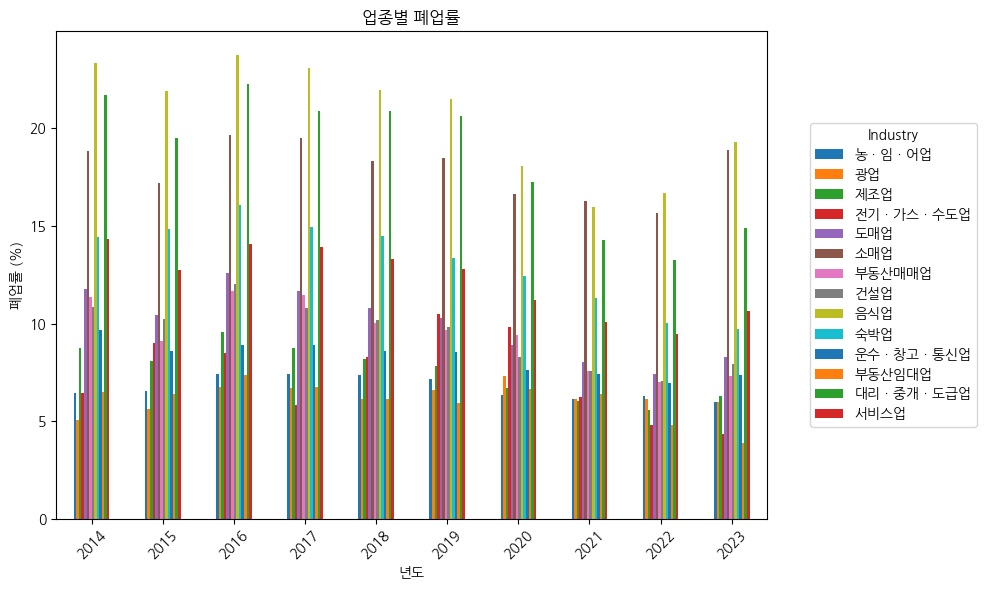

In [1083]:
# 막대 그래프 그리기
closed_pct_1.plot(kind='bar', figsize=(10, 6))

plt.title('업종별 폐업률')  # 그래프 제목
plt.xlabel('년도')  # x축 라벨
plt.ylabel('폐업률 (%)')  # y축 라벨
plt.xticks(rotation=45)  # x축 레이블 각도 조정

plt.legend(title='Industry', bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.tight_layout()  # 레이아웃 자동 조정

plt.show()


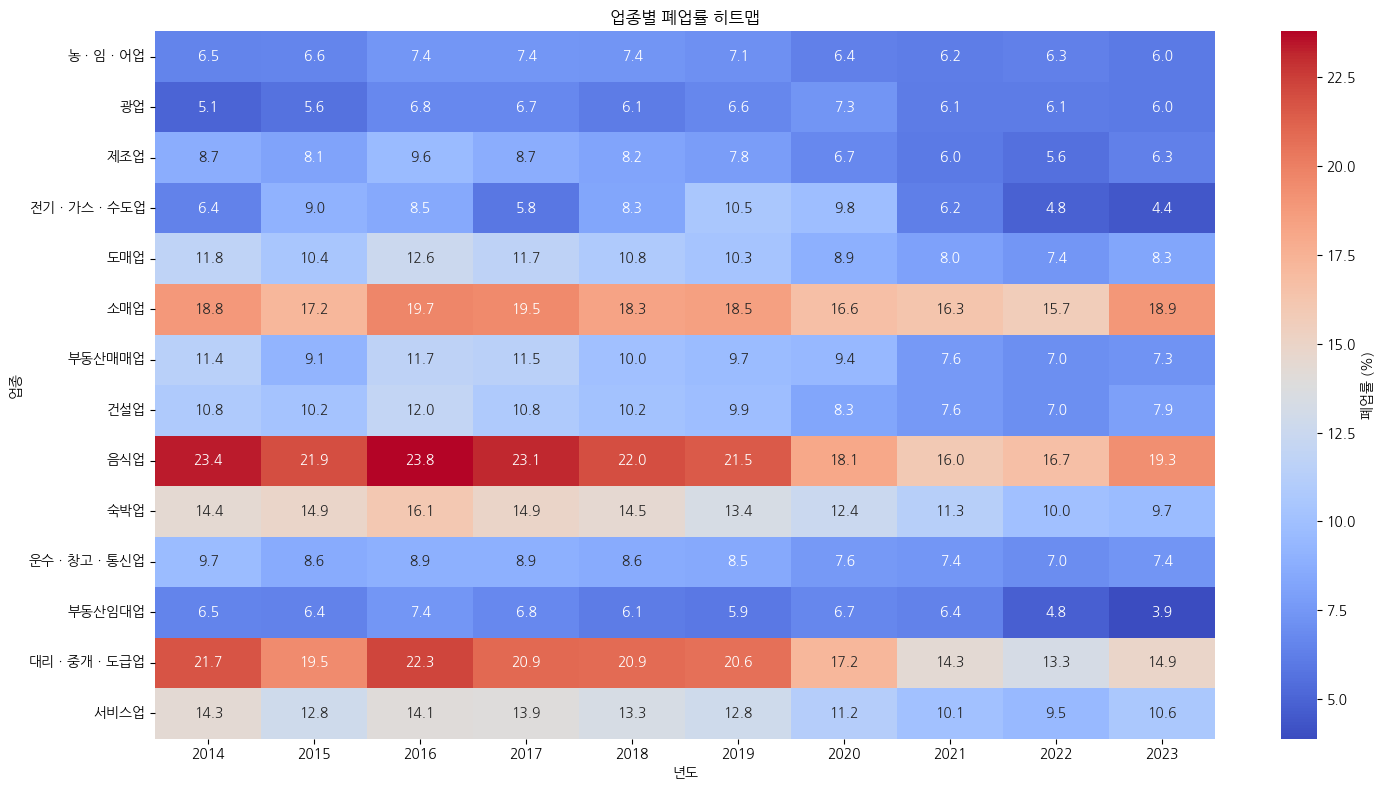

In [1084]:
import seaborn as sns

heatmap_data = closed_pct_1.T  # 행과 열 전환

# 히트맵 그리기
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': '폐업률 (%)'})

plt.title('업종별 폐업률 히트맵')  # 그래프 제목
plt.xlabel('년도')  # x축 라벨
plt.ylabel('업종')  # y축 라벨

plt.tight_layout()  # 레이아웃 자동 조정
plt.show()


1. 산업별 폐업률 추세
음식업: 2014년에는 23.4%였으나, 2023년에는 19.3%로 감소했습니다. 이는 음식업의 폐업률이 상대적으로 높은 수준을 유지했지만, 시간이 지나면서 다소 완화되었음을 나타냅니다.
소매업: 2014년과 2015년에는 각각 18.8%와 17.2%로 높은 폐업률을 보였으나, 2023년에는 16.6%로 점진적으로 감소했습니다.
부동산매매업: 2014년 11.4%에서 시작하여 2023년에는 7.3%로 감소했습니다.
2. 전체적인 경향
대부분의 산업에서 폐업률은 2014년부터 2023년까지 전반적으로 감소하는 추세를 보이고 있습니다. 이는 경제 상황이 개선되거나, 산업 내 경쟁력 향상 등이 영향을 미쳤을 가능성이 있습니다.
반면, 전기ㆍ가스ㆍ수도업이나 건설업 등의 산업은 폐업률이 낮고 안정적인 편입니다. 이는 해당 산업의 특성상 상대적으로 안정적인 수익 구조를 가지고 있기 때문일 수 있습니다.
3. 높은 폐업률 산업
음식업과 소매업은 여전히 높은 폐업률을 기록하고 있으며, 이는 경쟁이 치열하고, 소비자 선호도가 빠르게 변화하는 산업 특성 때문일 수 있습니다.
4. 시각적 해석
색상 맵을 통해 각 산업의 폐업률을 직관적으로 이해할 수 있습니다. 진한 빨간색은 높은 폐업률을 나타내고, 진한 파란색은 낮은 폐업률을 나타냅니다. 이를 통해 어떤 산업이 상대적으로 더 많은 폐업률을 보이는지 쉽게 비교할 수 있습니다.
결론
이 히트맵은 각 산업의 폐업률 변화를 한눈에 볼 수 있게 해주며, 이를 통해 산업별 동향이나 정부 정책, 경제 상황 등을 분석하는 데 유용한 자료로 활용될 수 있습니다. 추가적으로 더 깊은 분석이나 특정 산업에 대한 질문이 있으시면 말씀해 주세요!

### 소비자 물가 지수 <hr>

In [1085]:
cur = conn.cursor()
cur.execute('select * from 소비자물가지수')
rows = cur.fetchall()
rows

((2015, 94.861, 0.7),
 (2016, 95.783, 1.0),
 (2017, 97.645, 1.9),
 (2018, 99.086, 1.5),
 (2019, 99.466, 0.4),
 (2020, 100.0, 0.5),
 (2021, 102.5, 2.5),
 (2022, 107.72, 5.1),
 (2023, 111.59, 3.6))

In [1086]:
cpi = pd.DataFrame(rows)
cpi

,0,1,2
0,2015,94.861,0.7
1,2016,95.783,1.0
2,2017,97.645,1.9
3,2018,99.086,1.5
4,2019,99.466,0.4
5,2020,100.000,0.5
6,2021,102.500,2.5
7,2022,107.720,5.1
8,2023,111.590,3.6


In [1087]:
cpi.columns=['년도','소비자물가지수','소비자물가상승률']
cpi = cpi.set_index('년도')
cpi

,소비자물가지수,소비자물가상승률
년도,,
2015,94.861,0.7
2016,95.783,1.0
2017,97.645,1.9
2018,99.086,1.5
2019,99.466,0.4
2020,100.000,0.5
2021,102.500,2.5
2022,107.720,5.1
2023,111.590,3.6


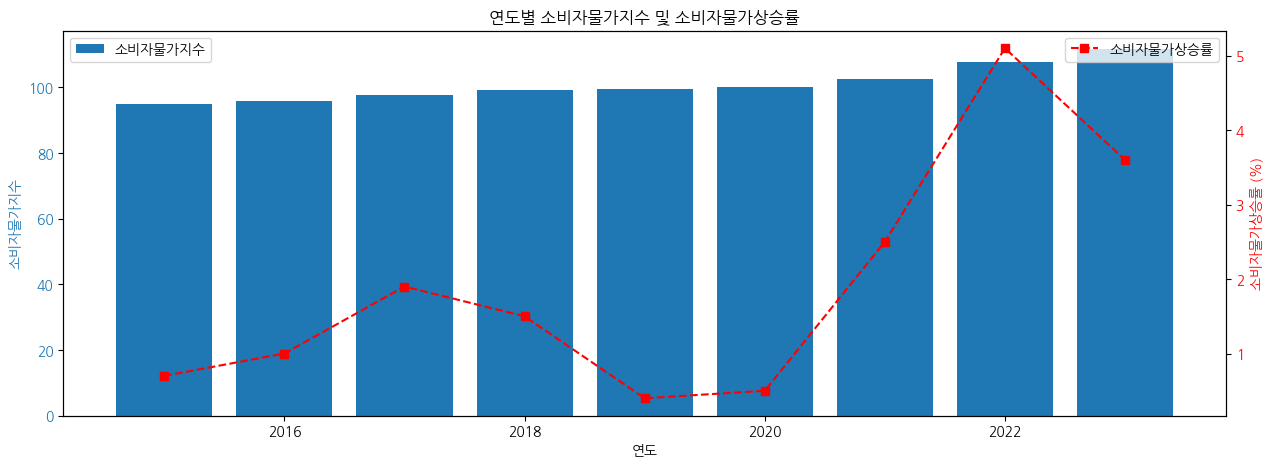

In [1088]:
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(15, 5))

# 좌측 Y축 (소비자물가지수)
ax1.bar(cpi.index, cpi["소비자물가지수"], color="#1f77b4", label="소비자물가지수")
ax1.set_ylabel("소비자물가지수", color="#1f77b4")
ax1.tick_params(axis="y", labelcolor="#1f77b4")

# 우측 Y축 (소비자물가상승률)
ax2 = ax1.twinx()
ax2.plot(cpi.index, cpi["소비자물가상승률"], color="red", marker="s", linestyle="dashed", label="소비자물가상승률")
ax2.set_ylabel("소비자물가상승률 (%)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# X축 설정
ax1.set_xlabel("연도")

# 제목 추가
plt.title("연도별 소비자물가지수 및 소비자물가상승률")

# 범례 추가
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# 그래프 표시
plt.show()

1. 그래프 구성
막대 그래프: 파란색 막대는 소비자 물가지수를 나타내며, 연도별로 소비자 물가지수가 어떻게 변화했는지를 보여줍니다.
선 그래프: 빨간색 점선은 소비자 물가 상승률을 나타내며, 이 역시 연도별 변화를 보여줍니다.
2. 소비자 물가지수
소비자 물가지수는 전반적으로 상승하는 추세를 보입니다. 특히 2016년부터 2023년까지 꾸준히 증가하고 있으며, 2022년에는 111.59로 가장 높은 값을 기록했습니다. 이는 물가가 전반적으로 상승하고 있다는 것을 나타냅니다.
3. 소비자 물가 상승률
소비자 물가 상승률은 변동성이 있으며, 2016년부터 2019년까지는 비교적 낮은 수준(1% 내외)을 유지하다가 2020년에는 0.5%로 감소했습니다.
2021년과 2022년에는 상승세를 보이며, 2022년에 5.1%로 급격히 증가했습니다. 이는 인플레이션이 심화되었음을 나타내며, 물가 상승의 압력이 증가했음을 시사합니다.
4. 주요 포인트
상관관계: 소비자 물가지수가 상승하는 동안 소비자 물가 상승률도 함께 증가하는 경향을 보입니다. 이는 일반적으로 물가 상승률이 높을수록 소비자 물가지수가 높아지는 것을 반영합니다.
경제 상황 반영: 2020년의 낮은 물가 상승률은 COVID-19 팬데믹과 같은 경제적 불확실성의 영향을 반영할 수 있습니다. 반면, 2021년과 2022년의 물가 상승률 급증은 경제 회복과 함께 공급망 문제, 수요 증가 등의 복합적인 요인에 기인할 수 있습니다.
결론
이 그래프는 소비자 물가지수와 물가 상승률의 변화를 시각적으로 잘 나타내어, 경제적 상황을 이해하는 데 도움을 줍니다. 인플레이션과 물가 상승의 관계를 분석하고, 향후 경제 정책 결정에 참고할 수 있는 중요한 데이터입니다.

업종별 폐업률 & 소비자 물가 지수 <hr>

1. 산업별 폐업률 히트맵
전반적인 경향: 여러 산업에서 2014년부터 2023년까지 폐업률이 전반적으로 감소하는 추세를 보이고 있습니다. 특히 음식업(23.4%에서 19.3%로 감소)과 소매업(18.8%에서 16.6%로 감소)에서 높은 폐업률이 관찰되지만, 시간이 지남에 따라 감소하고 있습니다.
음식업의 높은 폐업률: 음식업은 여전히 높은 폐업률을 유지하고 있으며, 이는 경쟁이 치열하고 소비자 선호도가 변화하기 쉬운 산업적 특성을 반영합니다.
2. 소비자 물가지수와 물가 상승률
소비자 물가지수: 전반적으로 상승하는 경향이 있으며, 특히 2022년에 급격히 증가했습니다. 이는 인플레이션의 영향을 반영할 수 있습니다.
물가 상승률: 2022년에는 5.1%로 급격히 상승하여 소비자 물가지수의 급증과 연관이 있습니다. 이는 물가 상승이 소비자들의 소비 패턴에 영향을 미칠 수 있음을 시사합니다.
3. 두 데이터 간의 연관성
물가 상승과 폐업률: 물가 상승률이 증가하면 소비자들의 구매력이 제한될 수 있으며, 이는 소매업과 음식업과 같은 산업에 악영향을 줄 수 있습니다. 높은 폐업률은 소비자들이 지출을 줄이는 경향을 반영할 수 있습니다.
경제적 불확실성: 2020년대 초반 COVID-19 팬데믹과 같은 경제적 불확실성이 있었던 시기에 물가 상승률이 낮아지면서 폐업률도 감소하는 경향이 나타났습니다. 그러나 2021년 이후 경제 회복과 함께 물가 상승률이 증가하며, 이에 따라 폐업률이 다시 증가할 수 있는 우려가 존재합니다.
4. 결론
이 두 그래프는 물가 상승률 증가가 소비자 행동과 산업의 건강성에 미치는 영향을 이해하는 데 중요한 단서를 제공합니다. 특히, 높은 물가 상승률이 소비자 지출에 미치는 영향과 그로 인한 폐업률 상승의 가능성을 시사합니다. 이러한 정보는 정책 입안자와 기업에게 중요한 참고 자료가 될 수 있습니다.

In [1089]:
cur = conn.cursor()
cur.execute('select * from interest_rates')
rows = cur.fetchall()
rows

((2014, Decimal('2.00')),
 (2015, Decimal('1.50')),
 (2016, Decimal('1.25')),
 (2017, Decimal('1.50')),
 (2018, Decimal('1.75')),
 (2019, Decimal('1.25')),
 (2020, Decimal('0.50')),
 (2021, Decimal('1.00')),
 (2022, Decimal('3.25')),
 (2023, Decimal('3.50')))

In [1090]:
rates = pd.DataFrame(rows)
rates.columns = ['년도','기준금리']
rates = rates.set_index('년도')
rates

,기준금리
년도,
2014,2.00
2015,1.50
2016,1.25
2017,1.50
2018,1.75
2019,1.25
2020,0.50
2021,1.00
2022,3.25


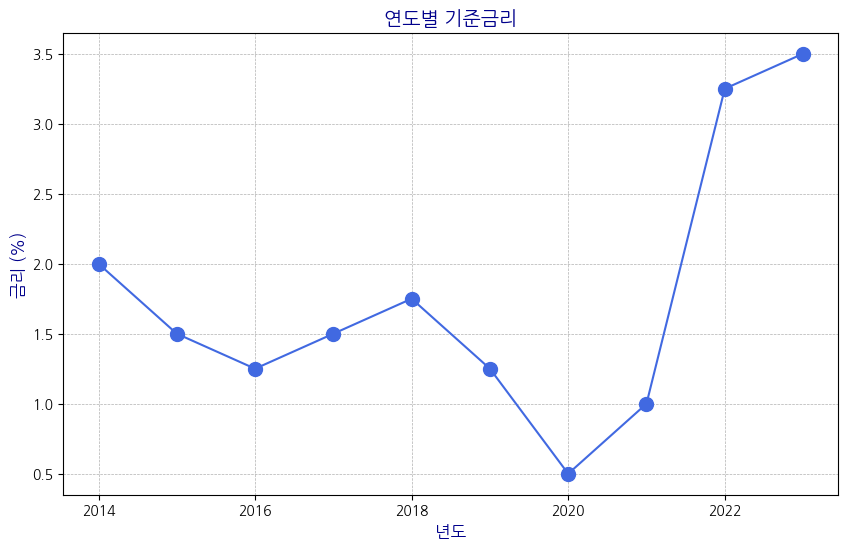

In [ ]:
# 피규어 크기 설정
plt.figure(figsize=(10, 6))

# 선 스타일과 색상, 마커 설정
plt.plot(rates.index, rates, color='royalblue', linestyle='-', marker='o', markersize=10)

# 축 레이블 설정
plt.xlabel('년도', fontsize=12, color='darkblue')
plt.ylabel('금리 (%)', fontsize=12, color='darkblue')

# 제목 추가 (선택 사항)
plt.title('연도별 기준금리', fontsize=14, color='darkblue')

# 그리드 추가 (선택 사항)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# 그래프 출력
plt.show()

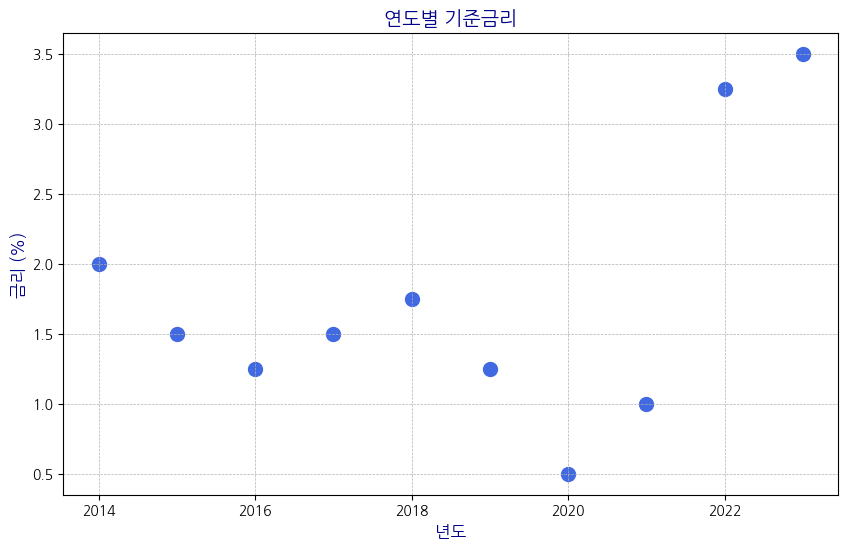

In [ ]:
plt.figure(figsize=(10, 6))
#plt.figure(figsize=(10, 6), facecolor='lightgrey 설정
#plt.figure(figsize=(10, 6),facecolor='lightgrey')

# Axes 객체 생성
ax = plt.gca()  # 현재 Axes 객체 가져오기

# Axes 배경 색상 설정
#ax.set_facecolor('#E0FFFF')  # 피규어 안의 색상 변경

# 산점도 스타일과 색상, 마커 설정
plt.scatter(rates.index, rates, color='royalblue', marker='o', s=100)

# 축 레이블 설정
plt.xlabel('년도', fontsize=12, color='darkblue')
plt.ylabel('금리 (%)', fontsize=12, color='darkblue')

# 제목 추가
plt.title('연도별 기준금리', fontsize=14, color='darkblue')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# 그래프 출력
plt.show()
